# test price distribution

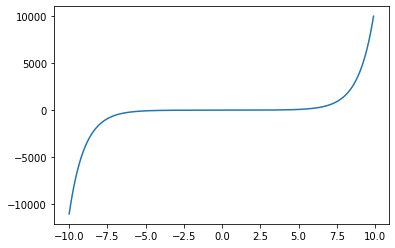

In [1]:
import numpy as np
import matplotlib.pyplot as plt
a=np.arange(-10,10,0.1)
#sinh(x)=[e^x-e^(-x)]/2
y=np.sinh(a)
plt.plot(a,y)

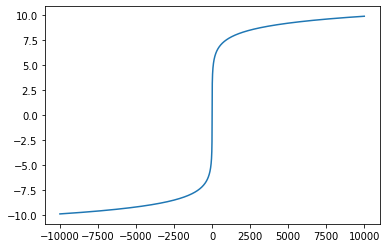

In [2]:

a=np.arange(-10000,10000,0.1)
#sinh(x)=[e^x-e^(-x)]/2
y=np.arcsinh(a)
# y=np.sin
plt.plot(a,y)

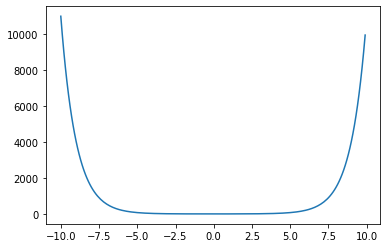

In [11]:
a=np.arange(-10,10,0.1)
#sinh(x)=[e^x-e^(-x)]/2
y=np.cosh(a)
plt.plot(a,y)

In [2]:

import numpy as np

def divide_order(orders=[]):
    orders=orders['data']
    ask_orders=[]
    bid_orders=[]
    for iorder in orders:
        if iorder['type']==0:
            ask_orders.append(iorder)
        if iorder['type']==1:
            bid_orders.append(iorder)
    return ask_orders,bid_orders   

def gen_price(last_price=1.2,gap_precent=0.001,price_scale=0.2,bid_size=100,ask_size=100):
    Y=np.sinh(10)
    y_max=Y*price_scale
    y_min=Y*gap_precent
    a_max=np.arcsinh(y_max)
    a_min=np.arcsinh(y_min)

    a=np.random.uniform(a_min,a_max,size=[ask_size])
    # print(np.sinh(a),Y,last_price)
    ask_price=np.sinh(a)/Y*last_price+last_price

    a=np.random.uniform(-a_max,-a_min,size=[bid_size])
    bid_price=np.sinh(a)/Y*last_price+last_price
    
    return ask_price,bid_price

# plt.hist(bid_price,100)

# plt.plot(a,y)

# ask_max=last_price*(1+price_scale)
# ask_min=last_price*(1+gap_precent)
# bid_max=last_price*(1-gap_precent)
# bid_min=last_price*(1-price_scale)

# print(len(a))
# ask_price=list(filter(lambda x:x>10*gap_precent/2,a))
# ask_price=list(filter(lambda x:x>y_max*gap_precent/2 and x<y_max*price_scale,y))
# ask_price=(np.array(ask_price)/y_max+1)*last_price
# bid_price=list(filter(lambda x:x<-y_max*gap_precent/2 and x>-y_max*price_scale,y))
# bid_price=(np.array(bid_price)/y_max+1)*last_price

# _=plt.hist(bid_price,100)
# _=plt.hist(ask_price,100)


# 根据 bid_price,ask_price 下单

In [93]:

from xt_api import SignedRequestAPI
from xt_utils import get_auth_payload
from xt_api import PublicRequestAPI
pb = PublicRequestAPI()
accesskey = '9f94baf4-b87b-498c-8457-2f888ad58c23'
secretkey = '30e22600e25c5b04034b396d12ace15fcecf56ad'
sra = SignedRequestAPI(accesskey, secretkey)
price_Point=4
coin_Point=4
symbol='xrp_usdt'

ask_price,bid_price=gen_price(last_price=1.1921,gap_precent=0.001,price_scale=0.2,bid_size=50,ask_size=50)

price=[round(x,price_Point) for x in bid_price]#买单
data=[{'price':i,'amount':round(np.random.random()+1,coin_Point),'type':1} for i in price]

price=[round(x,price_Point) for x in ask_price]#卖单
data1=[{'price':i,'amount':round(np.random.random()+1,coin_Point),'type':0} for i in price]
data.extend(data1)

kws=get_auth_payload({'market':symbol,'data':data})
status,orders,_=sra.palce_orders(kwargs=kws)

ask_orders,bid_orders=divide_order(orders=orders)

Please wait a moment...retry now... times is 2


In [5]:
ask_orders

[{'id': '6833941981354674184', 'type': 0, 'price': '1.2225', 'amount': '1.3'},
 {'id': '6833941981354674185', 'type': 0, 'price': '1.2027', 'amount': '1.3'},
 {'id': '6833941981354674186', 'type': 0, 'price': '1.3534', 'amount': '1.3'},
 {'id': '6833941981354674187', 'type': 0, 'price': '1.206', 'amount': '1.3'},
 {'id': '6833941981354674188', 'type': 0, 'price': '1.2069', 'amount': '1.3'},
 {'id': '6833941981354674189', 'type': 0, 'price': '1.2162', 'amount': '1.3'},
 {'id': '6833941981354674190', 'type': 0, 'price': '1.2025', 'amount': '1.3'},
 {'id': '6833941981354674191', 'type': 0, 'price': '1.23', 'amount': '1.3'},
 {'id': '6833941981354674192', 'type': 0, 'price': '1.2085', 'amount': '1.3'},
 {'id': '6833941981354674193', 'type': 0, 'price': '1.2014', 'amount': '1.3'},
 {'id': '6833941981354674194', 'type': 0, 'price': '1.2004', 'amount': '1.3'},
 {'id': '6833941981354674195', 'type': 0, 'price': '1.2005', 'amount': '1.3'},
 {'id': '6833941981354674196', 'type': 0, 'price': '1.2

In [85]:

# res=pb.get_all_market_config()
# print(res[1]['btc_usdt'],
# res[1]['xrp_usdt']['pricePoint'],
# res[1]['xrp_usdt']['coinPoint'])
np.random.random()

0.5538817649468095

In [3]:

import random
from xt_api import SignedRequestAPI
from xt_utils import get_auth_payload
from xt_api import PublicRequestAPI
pb = PublicRequestAPI()
accesskey = '9f94baf4-b87b-498c-8457-2f888ad58c23'
secretkey = '30e22600e25c5b04034b396d12ace15fcecf56ad'
sra = SignedRequestAPI(accesskey, secretkey)
price_Point=4
coin_Point=4
symbol='xrp_usdt'

#挂上初始买卖单###########################
status,data,_=pb.get_ticker(kwargs={'market':symbol})
last_price=data['price']
ask_price,bid_price=gen_price(last_price=last_price,gap_precent=0.001,price_scale=0.2,bid_size=50,ask_size=50)

price=[round(x,price_Point) for x in bid_price]#买单
data=[{'price':i,'amount':round(np.random.random()+1,coin_Point),'type':1} for i in price]

price=[round(x,price_Point) for x in ask_price]#卖单
data1=[{'price':i,'amount':round(np.random.random()+1,coin_Point),'type':0} for i in price]
data.extend(data1)

kws=get_auth_payload({'market':symbol,'data':data})
status,orders,_=sra.palce_orders(kwargs=kws)

ask_orders,bid_orders=divide_order(orders=orders)
###########################

sample_ratio=0.5

def update_depth(bid_orders=[],ask_orders=[],last_price=1.0):
    #从order产生orderid
    bid_orderids=[]
    for iorder in bid_orders:
        bid_orderids.append(iorder['id'])
    ask_orderids=[]
    for iorder in ask_orders:
        ask_orderids.append(iorder['id'])
    
    # bids_sample_num = int(len(bid_orderids)*sample_ratio)
    # bids_cancel_orderid=random.sample(bid_orderids, bids_sample_num)
    # for i in bids_cancel_orderid:
    #     bid_orderids.remove(i)
    #     for iorder in bid_orders:
    #         if iorder['id']==i:
    #             bid_orders.remove(iorder)
    bids_cancel_orderid=[]
    bids_sample_num = int(len(bid_orders)*sample_ratio)
    bids_cancel_order=random.sample(bid_orders, bids_sample_num)
    for i in bids_cancel_order:
        # bid_orders.remove(i)
        # bid_orderids.remove(i['id'])
        bids_cancel_orderid.append(i['id'])

                
    # asks_sample_num = int(len(ask_orderids)*sample_ratio)
    # asks_cancel_orderid=random.sample(ask_orderids, asks_sample_num)
    # for i in asks_cancel_orderid:
    #     ask_orderids.remove(i)
    #     for iorder in ask_orders:
    #         if iorder['id']==i:
    #             ask_orders.remove(iorder)
    asks_cancel_orderid=[]
    asks_sample_num = int(len(ask_orders)*sample_ratio)
    asks_cancel_order=random.sample(ask_orders, asks_sample_num)
    for i in asks_cancel_order:
        # ask_orders.remove(i)
        # ask_orderids.remove(i['id'])
        asks_cancel_orderid.append(i['id'])
 
    
    bids_cancel_orderid.extend(asks_cancel_orderid)
    cancel_orderid=bids_cancel_orderid
    # 撤销部分单子
    kws=get_auth_payload({'market':symbol,'data':cancel_orderid})
    status,orders,_=sra.cancel_orders(kwargs=kws)
    
    # 查询ask，bid挂单数量
    kws=get_auth_payload({'market':symbol,'page':1,'pageSize':200 })
    status,orders,_=sra.get_unfinished_order(kwargs=kws)
    ask_orders,bid_orders=divide_order(orders=orders)
    # 补上相应数量的单子
    # print(len(bid_orders),len(ask_orders),last_price)
    ask_price,bid_price=gen_price1(p=p,last_price=last_price,gap_precent=0.001,price_scale=0.2,bid_size=50-len(bid_orders),ask_size=50-len(ask_orders))

    price=[round(x,price_Point) for x in bid_price]#买单
    data=[{'price':i,'amount':round(np.random.random()+1,coin_Point),'type':1} for i in price]

    price=[round(x,price_Point) for x in ask_price]#卖单
    data1=[{'price':i,'amount':round(np.random.random()+1,coin_Point),'type':0} for i in price]
    data.extend(data1)
    kws=get_auth_payload({'market':symbol,'data':data})
    status,orders,_=sra.palce_orders(kwargs=kws)
    
    # ask_orders1,bid_orders1=divide_order(orders=orders)
    # for iorder in bid_orders1:
    #     bid_orders.append(iorder)
    #     bid_orderids.append(iorder['id'])
    # for iorder in ask_orders1:
    #     ask_orders.append(iorder)
    #     ask_orderids.append(iorder['id'])

    
    return bid_orders,ask_orders,last_price
    
count=0

status,data,_=pb.get_ticker(kwargs={'market':symbol})
last_price=data['price']

while count!=1000:
    count=count+1
    print(count)
    # 下随机买卖单
    status,data,_=pb.get_depth(kwargs={'market':symbol})
    if random.sample([0,1],1)[0]:#下买单
        price=data['asks'][0][0]
        vol=data['asks'][0][1]
        otype=1
    else:#下卖单
        price=data['bids'][0][0]
        vol=data['bids'][0][1]
        otype=0
    
    # ask_orders=sorted(ask_orders,key=lambda x:float(x['price']),reverse=False)
    # bid_orders=sorted(bid_orders,key=lambda x:float(x['price']),reverse=True)
    # # print(ask_orders[0])
    # if random.sample([0,1],1)[0]:#下买单
    #     price=float(ask_orders[0]['price'])
    #     try:
    #         vol=float(ask_orders[0]['number'])
    #     except:
    #         vol=float(ask_orders[0]['amount'])
    #     otype=1
    #     ask_orders.remove(ask_orders[0])
    # else:#下卖单
    #     price=float(bid_orders[0]['price'])
    #     try:
    #         vol=float(bid_orders[0]['number'])
    #     except:
    #         vol=float(bid_orders[0]['amount'])
    #     otype=0
    #     bid_orders.remove(bid_orders[0])
    
    kws=get_auth_payload({'market':symbol,'price':price,'number':vol,'type':otype,'entrustType':0})
    status, data, _=sra.palce_order(kwargs=kws)

    
    #查询最新挂单
    kws=get_auth_payload({'market':symbol,'page':1,'pageSize':200 })
    status,orders,_=sra.get_unfinished_order(kwargs=kws)
    ask_orders,bid_orders=divide_order(orders=orders)
    #查询最新价格
    status,data,_=pb.get_ticker(kwargs={'market':symbol})
    last_price=data['price']
    # last_price=float(price)
    
    bid_orders,ask_orders,last_price=update_depth(bid_orders=bid_orders,ask_orders=ask_orders,last_price=last_price)

Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 1
1
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
2
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
3
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 1
Please 

KeyboardInterrupt: 

# 批量撤单 askorder,bidorder

In [7]:
bid_orderids=[]
for iorder in bid_orders:
    bid_orderids.append(iorder['id'])

kws=get_auth_payload({'market':symbol,
                         'data':bid_orderids,
                         })
status,orders,_=sra.cancel_orders(kwargs=kws)

ask_orderids=[]
for iorder in ask_orders:
    ask_orderids.append(iorder['id'])

kws=get_auth_payload({'market':symbol,
                         'data':ask_orderids,
                         })
status,orders,_=sra.cancel_orders(kwargs=kws)


Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 2


In [9]:
from functools import reduce
li = [1, 2, 3, 4, 5]
# 序列中的每个元素加1
print(list(map(lambda x: x+1, li))) # [2,3,4,5,6]

# 返回序列中的偶数
print(list(filter(lambda x: x % 2 == 0, li)))# [2, 4]

# 返回所有元素相乘的结果
reduce(lambda x, y: x * y, li) # 1*2*3*4*5 = 120

[2, 3, 4, 5, 6]
[2, 4]


120

In [69]:
np.random.uniform(1,10,size=[5])

array([8.18343929, 3.11939279, 5.89663438, 7.20625089, 9.06228377])

# random walk

Text(0.5, 1.0, 'Random Walk')

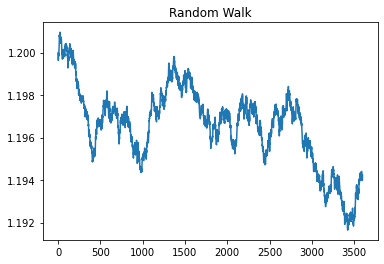

In [23]:

import numpy as np
import matplotlib.pyplot as plt
 
n = 3600
white_noise = np.random.standard_normal(size=n)
# plt.hist(white_noise,100)
random_walk = [1.2]
for i in range(n):
    old_total_noise = random_walk[i]
    new_noise = white_noise[i]
    random_walk.append(old_total_noise *(1+new_noise/10000) )
random_walk = np.array(random_walk)
plt.plot(random_walk)
plt.title("Random Walk")

# 迭代更新方式

In [4]:
import random
from xt_api import SignedRequestAPI
from xt_utils import get_auth_payload
from xt_api import PublicRequestAPI
pb = PublicRequestAPI()
accesskey = '9f94baf4-b87b-498c-8457-2f888ad58c23'
secretkey = '30e22600e25c5b04034b396d12ace15fcecf56ad'
sra = SignedRequestAPI(accesskey, secretkey)
price_Point=4
coin_Point=4
symbol='xrp_usdt'

#挂上初始买卖单###########################
status,data,_=pb.get_ticker(kwargs={'market':symbol})
last_price=data['price']
def init_order(last_price): 
    ask_price,bid_price=gen_price(last_price=last_price,gap_precent=0.001,price_scale=0.2,bid_size=50,ask_size=50)

    price=[round(x,price_Point) for x in bid_price]#买单
    data=[{'price':i,'amount':round(np.random.random()+10,coin_Point),'type':1} for i in price]

    price=[round(x,price_Point) for x in ask_price]#卖单
    data1=[{'price':i,'amount':round(np.random.random()+10,coin_Point),'type':0} for i in price]
    data.extend(data1)

    kws=get_auth_payload({'market':symbol,'data':data})
    status,orders,_=sra.palce_orders(kwargs=kws)
init_order(last_price)
# ask_orders,bid_orders=divide_order(orders=orders)
###########################

sample_ratio=0.5
def get_unfinished_order():
    #查询最新挂单
    kws=get_auth_payload({'market':symbol,'page':1,'pageSize':200 })
    status,orders,_=sra.get_unfinished_order(kwargs=kws)
    return divide_order(orders=orders)
    
def update_price(last_price):
    #根据价格下相同价格相同数量的买卖单
    amount=round(np.random.random()+1,coin_Point)
    data=[{'price':last_price,'amount':amount,'type':0},
        {'price':last_price,'amount':amount,'type':1}]
    kws=get_auth_payload({'market':symbol,'data':data})
    status,orders,_=sra.palce_orders(kwargs=kws)
        
def update_depth(bid_orders=[],ask_orders=[],last_price=1.0):
    # 查询ask，bid挂单
    ask_orders,bid_orders=get_unfinished_order()
    #从order产生orderid
    bid_orderids=[]
    for iorder in bid_orders:
        bid_orderids.append(iorder['id'])
    ask_orderids=[]
    for iorder in ask_orders:
        ask_orderids.append(iorder['id'])
        
    
    #撤销价格变化必须撤销的挂单
    bids_cancel_orderid=[]
    asks_cancel_orderid=[]
    for iorder in bid_orders:
        if float(iorder['price'])>=last_price:
            bids_cancel_orderid.append(iorder['id'])
            bid_orders.remove(iorder)
    for iorder in ask_orders:
        if float(iorder['price'])<=last_price:
            asks_cancel_orderid.append(iorder['id'])
            ask_orders.remove(iorder)
    #剩下单子里面随机更新
    bids_sample_num = int(len(bid_orders)*sample_ratio)
    bids_cancel_order=random.sample(bid_orders, bids_sample_num)
    for i in bids_cancel_order:
        bids_cancel_orderid.append(i['id'])
    asks_sample_num = int(len(ask_orders)*sample_ratio)
    asks_cancel_order=random.sample(ask_orders, asks_sample_num)
    for i in asks_cancel_order:
        asks_cancel_orderid.append(i['id'])
 
 
    bids_cancel_orderid.extend(asks_cancel_orderid)
    cancel_orderid=bids_cancel_orderid
    # 撤销部分单子
    kws=get_auth_payload({'market':symbol,'data':cancel_orderid})
    status,orders,_=sra.cancel_orders(kwargs=kws)
    
    # 查询ask，bid挂单
    ask_orders,bid_orders=get_unfinished_order()
    # 补上相应数量的单子
    ask_price,bid_price=gen_price(last_price=last_price,gap_precent=0.001,price_scale=0.2,bid_size=50-len(bid_orders),ask_size=50-len(ask_orders))

    price=[round(x,price_Point) for x in bid_price]#买单
    data=[{'price':i,'amount':round(np.random.random()+1,coin_Point),'type':1} for i in price]

    price=[round(x,price_Point) for x in ask_price]#卖单
    data1=[{'price':i,'amount':round(np.random.random()+1,coin_Point),'type':0} for i in price]
    data.extend(data1)
    kws=get_auth_payload({'market':symbol,'data':data})
    status,orders,_=sra.palce_orders(kwargs=kws)
    
    # 更新k线
    update_price(last_price=last_price)
    
    return bid_orders,ask_orders,last_price
    
count=0

status,data,_=pb.get_ticker(kwargs={'market':symbol})
last_price=data['price']

while count!=1000000000:
    count=count+1
    print(count)
    # 生成随机价格
    last_price=round(last_price*(np.random.standard_normal(size=1)[0]/1000+1),price_Point)
    bid_orders,ask_orders,last_price=update_depth(bid_orders=[],ask_orders=[],last_price=last_price)

Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 1
1
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 2
2
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 2
3
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 2
4
Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2
Please wait a moment...retry now... times is 1
Pleas

KeyboardInterrupt: 

# 单步按分布更新

In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt
from xt_api import SignedRequestAPI
from xt_utils import get_auth_payload
from xt_api import PublicRequestAPI
pb = PublicRequestAPI()
accesskey = '9f94baf4-b87b-498c-8457-2f888ad58c23'
secretkey = '30e22600e25c5b04034b396d12ace15fcecf56ad'
sra = SignedRequestAPI(accesskey, secretkey)
price_Point=4
coin_Point=4
gap_precent=0.001
price_scale=0.2
symbol='xrp_usdt'

def get_random(a,b):
    return random.random()*(b-a)+a
def Mysample(func,a,b,c,size):
# a,b,c, is the Monte Carlo range for x,y
# must cover func
# defaut func>0
    cout=0
    res=[]
    while cout<size:
        # print(a,b,c,size,cout)
        x=get_random(a,b)
        y=get_random(0,c)
        if(func(x)>y):
            cout+=1
            res.append(x)
    return res

def p(a):
    return (1+a*(a**2+1)**(-0.5) )/(a+np.sqrt(a**2+1))
def gen_price1(p,last_price=1.2,gap_precent=0.001,price_scale=0.2,bid_size=100,ask_size=100):
    data=Mysample(p,0,10,1.1,ask_size)
    amin=last_price*(1+gap_precent)
    amax=last_price*(1+price_scale)
    ask_price=np.array(data)/10*(amax-amin)+amin
    
    data=Mysample(p,-10,0,1.1,bid_size)
    amax=last_price*(1-gap_precent)
    amin=last_price*(1-price_scale)
    bid_price=np.array(data)/10*(amax-amin)+amax
    return ask_price,bid_price
def p1(a,last_price):
    amin=last_price*(1+gap_precent)
    amax=last_price*(1+price_scale)
    return p((a-amin)/(amax-amin)*10)
def p2(a,last_price):
    bmax=last_price*(1-gap_precent)
    bmin=last_price*(1-price_scale)
    return p((a-bmax)/(bmax-bmin)*10)
def P_diff1(x):
    return p2(x,last_price1)
def P_diff(x):
    a=last_price1*(1+gap_precent)
    b=last_price*(1+price_scale)
    c=last_price1*(1+price_scale)
    if a>b:
        return p1(x,last_price1)
    if x>=a and x<=b:
        return p1(x,last_price1)-p1(x,last_price)
    if x>b and x<=c:
        return p1(x,last_price1)
    return 0
def P_diff2(x):
    return p1(x,last_price1)
def P_diff4(x):
    if bmax1<bmin:
        return p1(x,last_price1)
    if x>=bmin and x<=bmax1:
        return p1(x,last_price1)-p1(x,last_price)
    if x<=bmin:
        return p1(x,last_price1)
    return 0
def cancel_by_prob(p):
    if random.random()<p:
        return True
    return False
def update_boundary(last_price):
    amin=last_price*(1+gap_precent)
    amax=last_price*(1+price_scale)
    bmax=last_price*(1-gap_precent)
    bmin=last_price*(1-price_scale)
    return amin,amax,bmax,bmin

def update_priceup(last_price,last_price1,old_ask_price,old_bid_price,bid_order_num,ask_order_num):
    amin,amax,bmax,bmin=update_boundary(last_price)
    amin1,amax1,bmax1,bmin1=update_boundary(last_price1)
    # deal ask_price
    #先撤单
    cancel_ask_price=[i for i in old_ask_price if i <= amin1]
    #撤多少补多少
    add_ask_price= Mysample(P_diff,amin1,amax1,1,len(cancel_ask_price))
    new_ask_price=[i for i in old_ask_price if i > amin1]
    new_ask_price.extend(add_ask_price)

    # deal bid_price
    #先按比率撤单
    cancel_bid_price=[]
    for i in old_bid_price:
        if i<bmax and i>bmin1:
            prob=(p2(i,last_price)-p2(i,last_price1))/p2(i,last_price)
            if cancel_by_prob(prob):
                cancel_bid_price.append(i)
        else:
            cancel_bid_price.append(i)
    new_bid_price=[]
    new_bid_price.extend(old_bid_price)
    for i in cancel_bid_price: new_bid_price.remove(i)
    #撤多少补多少
    add_bid_price= Mysample(P_diff1,max(bmax,bmin1),bmax1,1,bid_order_num-len(new_bid_price))
    new_bid_price.extend(add_bid_price)
    return new_bid_price,new_ask_price,cancel_bid_price,cancel_ask_price,add_bid_price,add_ask_price

def update_pricedown(last_price,last_price1,old_ask_price,old_bid_price,bid_order_num,ask_order_num):
    amin,amax,bmax,bmin=update_boundary(last_price)
    amin1,amax1,bmax1,bmin1=update_boundary(last_price1)
    cancel_ask_price=[]
    for i in old_ask_price:
        if i<amax1:
            prob=(p2(i,last_price)-p2(i,last_price1))/p2(i,last_price)
            if cancel_by_prob(prob):
                cancel_ask_price.append(i)
        else:
            cancel_ask_price.append(i)
    new_ask_price=[]
    new_ask_price.extend(old_ask_price)
    for i in cancel_ask_price: new_ask_price.remove(i)
    #撤多少补多少
    add_ask_price= Mysample(P_diff2,amin1,min(amin,amax1),1,ask_order_num-len(new_ask_price))
    new_ask_price.extend(add_ask_price)

    # deal bid_price
    #先撤单
    cancel_bid_price=[i for i in old_bid_price if i >= bmax1]
    #撤多少补多少
    add_bid_price= Mysample(P_diff4,bmin1,bmax1,1,len(cancel_bid_price))
    new_bid_price=[i for i in old_bid_price if i < bmax1]
    new_bid_price.extend(add_bid_price)
    return new_bid_price,new_ask_price,cancel_bid_price,cancel_ask_price,add_bid_price,add_ask_price
def update_pricechange(last_price,last_price1,old_ask_price,old_bid_price,bid_order_num,ask_order_num): 
    if last_price1>last_price:
        return update_priceup(last_price=last_price,last_price1=last_price1,old_ask_price=
                              old_ask_price,old_bid_price=old_bid_price,
                              bid_order_num=bid_order_num,ask_order_num=ask_order_num)
    else:
        return update_pricedown(last_price=last_price,last_price1=last_price1,old_ask_price=
                                old_ask_price,old_bid_price=old_bid_price,
                                bid_order_num=bid_order_num,ask_order_num=ask_order_num)
def place_orders(symbol,data):
    if len(data)<=100:
        kws=get_auth_payload({'market':symbol,'data':data})
        status,orders,_=sra.palce_orders(kwargs=kws)
    else:
        for i in range(len(data)//100):
            kws=get_auth_payload({'market':symbol,'data':data[i*100:(1+i)*100]})
            status,orders,_=sra.palce_orders(kwargs=kws)            
        if(len(data)%100!=0):
            kws=get_auth_payload({'market':symbol,'data':data[i*100:(1+i)*100]})
            status,orders,_=sra.palce_orders(kwargs=kws)  
            
def init_order(last_price,bid_size,ask_size): 
    ask_price,bid_price=gen_price1(p=p,last_price=last_price,gap_precent=0.001,price_scale=0.2,
                                   bid_size=bid_size,ask_size=ask_size)
    price=[round(x,price_Point) for x in bid_price]#买单
    data=[{'price':i,'amount':round(np.random.random()+10,coin_Point),'type':1} for i in price]
    price=[round(x,price_Point) for x in ask_price]#卖单
    data1=[{'price':i,'amount':round(np.random.random()+10,coin_Point),'type':0} for i in price]
    data.extend(data1)
    place_orders(symbol=symbol,data=data)


def divide_order(orders=[]):
    orders=orders['data']
    ask_orders=[]
    bid_orders=[]
    for iorder in orders:
        if iorder['type']==0:
            ask_orders.append(iorder)
        if iorder['type']==1:
            bid_orders.append(iorder)
    return ask_orders,bid_orders
def get_unfinished_order():
    #查询最新挂单
    kws=get_auth_payload({'market':symbol,'page':1,'pageSize':200 })
    status,orders,_=sra.get_unfinished_order(kwargs=kws)
    return divide_order(orders=orders)
    
def update_price(last_price,last_price1):
    #根据价格下相同价格相同数量的买卖单
    amount=round(np.random.random()+100000*abs(last_price1-last_price)/last_price,coin_Point)
    data=[{'price':last_price1,'amount':amount,'type':0},
        {'price':last_price1,'amount':amount,'type':1}]
    kws=get_auth_payload({'market':symbol,'data':data})
    status,orders,_=sra.palce_orders(kwargs=kws)
        
# def update_depth(bid_orders=[],ask_orders=[],last_price=1.0):
#     sample_ratio=0.5
#     # 查询ask，bid挂单
#     ask_orders,bid_orders=get_unfinished_order()
#     #从order产生orderid
#     bid_orderids=[]
#     for iorder in bid_orders:
#         bid_orderids.append(iorder['id'])
#     ask_orderids=[]
#     for iorder in ask_orders:
#         ask_orderids.append(iorder['id'])
#     #撤销价格变化必须撤销的挂单
#     bids_cancel_orderid=[]
#     asks_cancel_orderid=[]
#     for iorder in bid_orders:
#         if float(iorder['price'])>=last_price:
#             bids_cancel_orderid.append(iorder['id'])
#             bid_orders.remove(iorder)
#     for iorder in ask_orders:
#         if float(iorder['price'])<=last_price:
#             asks_cancel_orderid.append(iorder['id'])
#             ask_orders.remove(iorder)
#     #剩下单子里面随机更新
#     bids_sample_num = int(len(bid_orders)*sample_ratio)
#     bids_cancel_order=random.sample(bid_orders, bids_sample_num)
#     for i in bids_cancel_order:
#         bids_cancel_orderid.append(i['id'])
#     asks_sample_num = int(len(ask_orders)*sample_ratio)
#     asks_cancel_order=random.sample(ask_orders, asks_sample_num)
#     for i in asks_cancel_order:
#         asks_cancel_orderid.append(i['id'])
 
#     bids_cancel_orderid.extend(asks_cancel_orderid)
#     cancel_orderid=bids_cancel_orderid
#     # 撤销部分单子
#     kws=get_auth_payload({'market':symbol,'data':cancel_orderid})
#     status,orders,_=sra.cancel_orders(kwargs=kws)
    
#     # 查询ask，bid挂单
#     ask_orders,bid_orders=get_unfinished_order()
#     # 补上相应数量的单子
#     ask_price,bid_price=gen_price1(p=p,last_price=last_price,gap_precent=0.001,price_scale=0.2,bid_size=50-len(bid_orders),ask_size=50-len(ask_orders))

#     price=[round(x,price_Point) for x in bid_price]#买单
#     data=[{'price':i,'amount':round(np.random.random()+1,coin_Point),'type':1} for i in price]

#     price=[round(x,price_Point) for x in ask_price]#卖单
#     data1=[{'price':i,'amount':round(np.random.random()+1,coin_Point),'type':0} for i in price]
#     data.extend(data1)
#     kws=get_auth_payload({'market':symbol,'data':data})
#     status,orders,_=sra.palce_orders(kwargs=kws)
    
#     # 更新k线
#     update_price(last_price=last_price)
#     return bid_orders,ask_orders,last_price

def get_orderid_by_price(price,order):            
    cancel_orderid=[]
    for pri in price:
        for x in order:
            if float(x['price'])==pri:
                cancel_orderid.append(x['id'])
                break 
    return cancel_orderid    
#挂上初始买卖单###########################
status,data,_=pb.get_ticker(kwargs={'market':symbol})
last_price=data['price']    
init_order(last_price,150,150)
###########################    
status,data,_=pb.get_ticker(kwargs={'market':symbol})
last_price=data['price']


0 10 1.1 150 0
0 10 1.1 150 0
0 10 1.1 150 0
0 10 1.1 150 0
0 10 1.1 150 0
0 10 1.1 150 1
0 10 1.1 150 2
0 10 1.1 150 2
0 10 1.1 150 2
0 10 1.1 150 3
0 10 1.1 150 3
0 10 1.1 150 3
0 10 1.1 150 3
0 10 1.1 150 3
0 10 1.1 150 3
0 10 1.1 150 3
0 10 1.1 150 3
0 10 1.1 150 3
0 10 1.1 150 3
0 10 1.1 150 4
0 10 1.1 150 4
0 10 1.1 150 4
0 10 1.1 150 4
0 10 1.1 150 5
0 10 1.1 150 6
0 10 1.1 150 6
0 10 1.1 150 7
0 10 1.1 150 7
0 10 1.1 150 7
0 10 1.1 150 7
0 10 1.1 150 7
0 10 1.1 150 8
0 10 1.1 150 9
0 10 1.1 150 10
0 10 1.1 150 10
0 10 1.1 150 11
0 10 1.1 150 12
0 10 1.1 150 12
0 10 1.1 150 12
0 10 1.1 150 12
0 10 1.1 150 13
0 10 1.1 150 13
0 10 1.1 150 13
0 10 1.1 150 13
0 10 1.1 150 13
0 10 1.1 150 13
0 10 1.1 150 13
0 10 1.1 150 14
0 10 1.1 150 14
0 10 1.1 150 14
0 10 1.1 150 15
0 10 1.1 150 15
0 10 1.1 150 15
0 10 1.1 150 16
0 10 1.1 150 17
0 10 1.1 150 18
0 10 1.1 150 19
0 10 1.1 150 19
0 10 1.1 150 19
0 10 1.1 150 19
0 10 1.1 150 19
0 10 1.1 150 19
0 10 1.1 150 19
0 10 1.1 150 19
0 10 1.1 

In [43]:
while True:
    #价格变化
    last_price1=round(last_price*(np.random.standard_normal(size=1)[0]/1000+1),price_Point)
    
    # status,data,_=pb.get_ticker(kwargs={'market':symbol})
    # last_price1=data['price']

    amin,amax,bmax,bmin=update_boundary(last_price)
    amin1,amax1,bmax1,bmin1=update_boundary(last_price1)
    #查询未完成订单
    kws=get_auth_payload({'market':symbol,'page':1,'pageSize':1000 })
    status,orders,_=sra.get_unfinished_order(kwargs=kws)
    ask_orders,bid_orders=divide_order(orders=orders)

    #提取价格
    old_ask_price=[float(x['price']) for x in ask_orders]
    old_bid_price=[float(x['price']) for x in bid_orders]

    new_bid_price,new_ask_price,cancel_bid_price,cancel_ask_price,add_bid_price,add_ask_price=update_pricechange(
        last_price=last_price,last_price1=last_price1,old_ask_price=old_ask_price,old_bid_price=old_bid_price,
        bid_order_num=150,ask_order_num=150)
    print('挂单数量:',len(ask_orders)+len(bid_orders),'撤单数量：',len(cancel_bid_price)+len(cancel_ask_price),
        '新挂单数量：',len(add_ask_price)+len(add_bid_price))
    #查询id
    cancel_orderid=get_orderid_by_price(price=cancel_ask_price,order=ask_orders)
    cancel_orderid.extend(get_orderid_by_price(price=cancel_bid_price,order=bid_orders))   
    # 撤单
    kws=get_auth_payload({'market':symbol,'data':cancel_orderid})
    status,orders,_=sra.cancel_orders(kwargs=kws)

    # 补单
    price=[round(x,price_Point) for x in add_bid_price]#买单
    data=[{'price':i,'amount':round(np.random.random()+10,coin_Point),'type':1} for i in price]
    price=[round(x,price_Point) for x in add_ask_price]#卖单
    data1=[{'price':i,'amount':round(np.random.random()+10,coin_Point),'type':0} for i in price]
    data.extend(data1)
    place_orders(symbol=symbol,data=data)

    # 更新k线
    update_price(last_price=last_price,last_price1=last_price1)
    last_price=last_price1
    print(last_price)

1.7385367999999997 1.7406388999999998 1 1
1.38944 1.7350632 1 28
挂单数量: 301 撤单数量： 29 新挂单数量： 29
1.7368
1.7369351999999998 1.7385367999999997 1 4
1.38816 1.7334648000000001 1 5
挂单数量: 302 撤单数量： 8 新挂单数量： 9
1.7352
1.7390373 2.08476 1 4
1.7334648000000001 1.7355627 1 0
挂单数量: 303 撤单数量： 7 新挂单数量： 4
1.7373
1.7380362999999999 1.7390373 1 2
1.38904 1.7345637 1 0
挂单数量: 300 撤单数量： 2 新挂单数量： 2
1.7363
1.7349332 1.7380362999999999 1 5
1.3865600000000002 1.7314668 1 2
挂单数量: 300 撤单数量： 7 新挂单数量： 7
1.7332
1.7352334999999999 2.0802 1 1
1.7314668 1.7317665 1 1
挂单数量: 300 撤单数量： 2 新挂单数量： 2
1.7335
1.7341323999999998 1.7352334999999999 1 0
1.38592 1.7306675999999999 1 2
挂单数量: 300 撤单数量： 2 新挂单数量： 2
1.7324
1.7309291999999998 1.7341323999999998 1 8
1.3833600000000001 1.7274708 1 4
挂单数量: 300 撤单数量： 12 新挂单数量： 12
1.7292
1.7293275999999997 1.7309291999999998 1 0
1.3820800000000002 1.7258724 1 2
挂单数量: 300 撤单数量： 2 新挂单数量： 2
1.7276
1.7303285999999998 2.0743199999999997 1 0
1.7258724 1.7268713999999998 1 0
挂单数量: 300 撤单数量： 0 新挂单数量：

KeyboardInterrupt: 

In [3]:
import threading

class MyThread(threading.Thread):
    def __init__(self, func, args):
        super(MyThread, self).__init__()
        self.func = func
        self.args = args

    def run(self):
        self.result = self.func(*self.args)

    def get_result(self):
        try:
            return self.result
        except Exception as e:
            print('thread exception:', e)
            return None
        
def acc_g():
    global g
    g+=1
    print(g)
    return g

threads = []
g=0
for i in range(100):
    t = MyThread(func=acc_g, args=())
    t.start()
    threads.append(t)
for t in threads:
    t.join()

1
2
3
4
5
6
7
8
9
10
11
12
13
1415

16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
3233

34
3536
37

38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
9394

95
96
97
98
99
100


In [31]:
# #根据id查询订单
# kws=get_auth_payload({'market':symbol,
#                          'data':orderids,
#                          })
# status,orders,_=sra.get_orders(kwargs=kws)
last_price=1.2054
while True:
    last_price=round(last_price*(np.random.standard_normal(size=1)[0]/10000+1),price_Point)
    amount=round(np.random.random()+1,coin_Point)
    data=[{'price':last_price,'amount':amount,'type':0},
        {'price':last_price,'amount':amount,'type':1}]
    kws=get_auth_payload({'market':symbol,'data':data})
    status,orders,_=sra.palce_orders(kwargs=kws)
    print(orders)

Please wait a moment...retry now... times is 2
{'code': 200, 'data': [{'id': '6835133187791144960', 'type': 0, 'price': '1.2053', 'amount': '1.841'}, {'id': '6835133187795339264', 'type': 1, 'price': '1.2053', 'amount': '1.841'}], 'info': 'Success.'}
Please wait a moment...retry now... times is 2
{'code': 200, 'data': [{'id': '6835133196460771328', 'type': 0, 'price': '1.2053', 'amount': '1.9843'}, {'id': '6835133196460771329', 'type': 1, 'price': '1.2053', 'amount': '1.9843'}], 'info': 'Success.'}
Please wait a moment...retry now... times is 2
{'code': 200, 'data': [{'id': '6835133209303730176', 'type': 0, 'price': '1.2053', 'amount': '1.9246'}, {'id': '6835133209303730177', 'type': 1, 'price': '1.2053', 'amount': '1.9246'}], 'info': 'Success.'}
Please wait a moment...retry now... times is 2
{'code': 200, 'data': [{'id': '6835133214060070912', 'type': 0, 'price': '1.2052', 'amount': '1.3918'}, {'id': '6835133214060070913', 'type': 1, 'price': '1.2052', 'amount': '1.3918'}], 'info': 'S

KeyboardInterrupt: 

In [28]:
#查询未完成订单
kws=get_auth_payload({'market':symbol,'page':1,'pageSize':200 })
status,orders,_=sra.get_unfinished_order(kwargs=kws)
ask_orders,bid_orders=divide_order(orders=orders)
print(len(ask_orders))
new_price=1.2
asks_cancel_orderid=[]
bids_cancel_orderid=[]
for iorder in ask_orders:
    if float(iorder['price'])<=new_price:asks_cancel_orderid.append(iorder['id'])
for iorder in bid_orders:
    if float(iorder['price'])>=new_price:bids_cancel_orderid.append(iorder['id'])
print(asks_cancel_orderid,bids_cancel_orderid)

Please wait a moment...retry now... times is 1
50
[] ['6835126991537457171', '6835126991537457168', '6835126991537457167', '6835126991537457166', '6835126991537457163', '6835126991537457159', '6835126930858461194', '6835126930858461192', '6835126930858461188', '6835126869948778517', '6835126869948778509', '6835126869948778505', '6835126825845671938', '6835126825841477642']


In [46]:


#查询深度
from xt_api import PublicRequestAPI
pb = PublicRequestAPI()
status,data,_=pb.get_depth(kwargs={'market':symbol})
if random.sample([0,1],1)[0]:
    #下买单
    price=data['asks'][0][0]
    vol=data['asks'][0][1]
    otype=1
else:#下卖单
    price=data['bids'][0][0]
    vol=data['bids'][0][1]
    otype=0
kws=get_auth_payload({'market':symbol,'price':price,'number':vol,'type':otype,'entrustType':0})
status, data, _=sra.palce_order(kwargs=kws)

Please wait a moment...retry now... times is 1
Please wait a moment...retry now... times is 2


In [46]:
kws=get_auth_payload({'market':symbol,'page':1,'pageSize':1000 })
status,orders,_=sra.get_unfinished_order(kwargs=kws)
ask_orders,bid_orders=divide_order(orders=orders)
old_ask_price=[float(x['price']) for x in ask_orders]
old_bid_price=[float(x['price']) for x in bid_orders]

oid=[]
for pri in old_ask_price:
    for x in ask_orders:
        if float(x['price'])==pri:
            oid.append(x['id'])
            break
print(oid)

# ask_orders=sorted(ask_orders,key=lambda x:float(x['price']),reverse=False)
# bid_orders=sorted(bid_orders,key=lambda x:float(x['price']),reverse=True)
# print(ask_orders[0],bid_orders[0]['price'])

Please wait a moment...retry now... times is 1
['6839538952253622336', '6839538952253622335', '6839538952253622334', '6839538952253622333', '6839538952253622332', '6839538952253622331', '6839538952253622330', '6839538952253622329', '6839538952253622328', '6839538952253622327', '6839538952253622326', '6839538952253622325', '6839538952253622324', '6839538952253622323', '6839538952253622322', '6839538952253622321', '6839538952253622320', '6839538952253622319', '6839538952253622318', '6839538952253622317', '6839538952253622316', '6839538952253622315', '6839538952253622314', '6839538952253622313', '6839538952253622312', '6839538952253622311', '6839538952253622310', '6839538952253622309', '6839538952253622308', '6839538952253622307', '6839538952253622306', '6839538952253622305', '6839538952253622304', '6839538952253622303', '6839538952253622302', '6839538952253622301', '6839538952253622300', '6839538952253622299', '6839538952253622298', '6839538952253622297', '6839538952253622296', '68395389

## 先改变最新成交价格，查询深度，随机吃掉档1的ask，bid
## 查询最新成交价格
## 查询所有未完成订单
## 随机挂单撤单